# Importing Libraries

In [55]:
import pandas as pd
import numpy as np

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, Activation

In [60]:
import matplotlib.pyplot as plt

In [61]:
from sklearn.metrics import classification_report
from sklearn import metrics

# Reading Dataset

In [62]:
Dataset = pd.read_csv("/content/drive/MyDrive/Project/Outputs/SAVEE_Features_Combined.csv")

In [63]:
Dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,labels
0,0.891084,0.033806,0.033111,0.595869,9.659194,21.865084,14.657446,26.055956,48.188286,57.217628,...,-6.759806,-1.404577,-7.749061,4.514760,-4.319347,-6.798388,-0.937824,-4.859028,-7.378529,happiness
1,0.992510,0.115383,0.112897,0.717496,9.752404,21.812602,14.762177,25.633570,47.725031,57.208579,...,-5.024803,-2.298325,-2.466918,0.868460,-0.779749,-3.724901,-1.261653,-3.115248,-5.149849,happiness
2,0.356943,0.011757,0.007314,0.051174,0.729597,2.490874,2.375560,8.371264,14.972178,12.979292,...,-6.260937,-3.008468,-6.202703,4.378581,-8.834075,-5.402733,-0.284534,-6.594661,-6.448785,happiness
3,6.519171,0.039830,0.215731,2.087920,6.649353,4.397666,4.603816,5.256814,4.088961,6.496548,...,-3.831077,-2.592651,-2.747179,6.166303,3.213481,-0.254544,0.335253,0.504263,-3.201196,neutral
4,6.535304,0.046004,0.225987,2.107937,6.652501,4.382972,4.595917,5.254234,4.103537,6.491094,...,-1.614392,0.377876,1.045155,1.378320,1.521758,0.945729,1.950349,1.057234,-0.017693,neutral


# Replacing Emotions by values

In [64]:
Dataset = Dataset.replace("anger", 0)
Dataset = Dataset.replace("disgust", 1)
Dataset = Dataset.replace("fear", 2)
Dataset = Dataset.replace("happiness", 3)
Dataset = Dataset.replace("sadness", 4)
Dataset = Dataset.replace("surprise", 5)
Dataset = Dataset.replace("neutral", 6)

#Changing pandas dataframe to numpy array

In [65]:
X = Dataset.iloc[:,:148].values
Y = Dataset.iloc[:,148:].values

In [66]:
X  # Features

array([[ 8.91083539e-01,  3.38060595e-02,  3.31106074e-02, ...,
        -9.37824368e-01, -4.85902834e+00, -7.37852859e+00],
       [ 9.92509973e-01,  1.15382819e-01,  1.12897284e-01, ...,
        -1.26165345e+00, -3.11524803e+00, -5.14984929e+00],
       [ 3.56943130e-01,  1.17570795e-02,  7.31377769e-03, ...,
        -2.84533590e-01, -6.59466124e+00, -6.44878483e+00],
       ...,
       [ 4.97943722e-02,  6.77891367e-05,  2.39193835e-03, ...,
         2.15542459e+00,  6.45807981e+00,  4.90848970e+00],
       [ 5.03241417e-02,  3.69230522e-04,  2.70053646e-03, ...,
         3.16022045e+00,  3.33960470e+00,  2.84013935e+00],
       [ 4.93937619e-02,  2.12858631e-05,  4.10851906e-04, ...,
         2.58409524e+00,  7.42069960e+00,  1.95977342e+00]])

In [67]:
Y  # Labels

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]])

#Normalizing the data

In [68]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [69]:
X

array([[-0.91526531, -0.08072411, -0.08505519, ..., -0.31234015,
        -0.65816744, -1.51108127],
       [-0.88357297, -0.01723236, -0.04702721, ..., -0.41214329,
        -0.27003632, -0.95097711],
       [-1.08216616, -0.09788499, -0.09735049, ..., -0.11099791,
        -1.04448509, -1.27742121],
       ...,
       [-1.17813979, -0.10698284, -0.09969634, ...,  0.64098981,
         1.86079768,  1.57685066],
       [-1.17797425, -0.10674823, -0.09954926, ...,  0.95066485,
         1.16668661,  1.05703983],
       [-1.17826496, -0.10701904, -0.10064057, ...,  0.77310481,
         2.07505786,  0.83578924]])

# One-Hot Encoding

In [70]:
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()

In [71]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

# Train-Test Split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

# Reshaping the data 

In [73]:
x_train = x_train.reshape(x_train.shape[0],37,4)
x_test = x_test.reshape(x_test.shape[0],37,4)

# Building the Neural Network

In [74]:
model = Sequential()
model.add(Conv1D(256, 5,padding='same', input_shape=(37,4))) #1
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same')) #2
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(128, 5,padding='same')) #3
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same')) #4
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same')) #5
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same')) #6
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7)) #7
model.add(Activation('softmax'))
#optimizer = keras.optimizers.RMSprop(learning_rate = 0.00001, decay = 1e-6)

# Compiling the Model

In [75]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 37, 256)           5376      
                                                                 
 activation_14 (Activation)  (None, 37, 256)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 37, 128)           163968    
                                                                 
 activation_15 (Activation)  (None, 37, 128)           0         
                                                                 
 dropout_4 (Dropout)         (None, 37, 128)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 12, 128)          0         
 1D)                                                             
                                                      

# Training the Model

In [77]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
36/36 [==============================] - 4s 82ms/step - loss: 1.7161 - accuracy: 0.3507 - val_loss: 1.6048 - val_accuracy: 0.3333
Epoch 2/50
36/36 [==============================] - 2s 68ms/step - loss: 1.3402 - accuracy: 0.4514 - val_loss: 1.3594 - val_accuracy: 0.4167
Epoch 3/50
36/36 [==============================] - 2s 69ms/step - loss: 1.2078 - accuracy: 0.5069 - val_loss: 1.2780 - val_accuracy: 0.4444
Epoch 4/50
36/36 [==============================] - 2s 68ms/step - loss: 1.0378 - accuracy: 0.5599 - val_loss: 1.0561 - val_accuracy: 0.5486
Epoch 5/50
36/36 [==============================] - 2s 69ms/step - loss: 0.9030 - accuracy: 0.6293 - val_loss: 1.0671 - val_accuracy: 0.5590
Epoch 6/50
36/36 [==============================] - 3s 72ms/step - loss: 0.7707 - accuracy: 0.6866 - val_loss: 1.1149 - val_accuracy: 0.5764
Epoch 7/50
36/36 [==============================] - 3s 74ms/step - loss: 0.6899 - accuracy: 0.7248 - val_loss: 0.8813 - val_accuracy: 0.6389
Epoch 8/50
36

# Checking Performance of the Model

In [78]:
y_pred = model.predict(x_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [79]:
# Classification Report
target_names = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']
print(classification_report(test, pred, target_names=target_names))

              precision    recall  f1-score   support

       anger       0.67      0.78      0.72        36
     disgust       0.97      0.77      0.86        39
        fear       0.70      0.66      0.68        35
   happiness       0.84      0.64      0.73        42
     sadness       0.79      0.75      0.77        44
    surprise       0.69      0.79      0.74        39
     neutral       0.79      0.94      0.86        53

    accuracy                           0.77       288
   macro avg       0.78      0.76      0.76       288
weighted avg       0.78      0.77      0.77       288



# **Confusion Matrix**

In [80]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix(test, pred)

array([[28,  0,  2,  3,  0,  2,  1],
       [ 0, 30,  2,  0,  4,  0,  3],
       [ 3,  0, 23,  1,  1,  6,  1],
       [ 8,  0,  0, 27,  1,  6,  0],
       [ 2,  0,  1,  0, 33,  0,  8],
       [ 1,  1,  5,  1,  0, 31,  0],
       [ 0,  0,  0,  0,  3,  0, 50]])

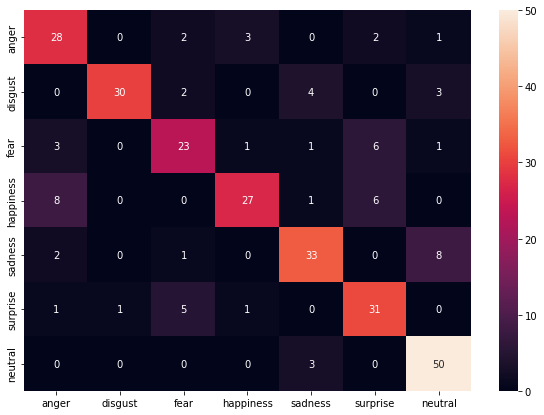

In [82]:
df_cm = pd.DataFrame(confusion_matrix(test, pred), index = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral'], columns = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# Plotting the Performance metrices

### Accuracy Graph

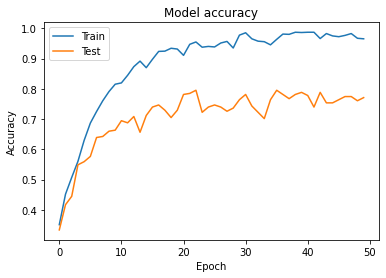

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Loss Graph

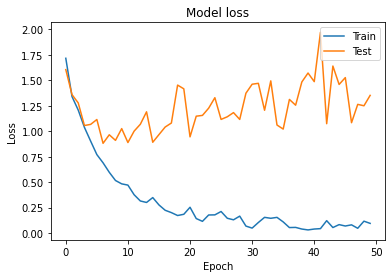

In [84]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

## NO ROC/AUC Curve as we have Multi-Class Classification Dataset